# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [2]:
# pip install the necessary libraries
!pip install sympy==1.13.3

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.integrate import quad

In [6]:
def dy_dx(f, x):
  first_derivative = diff(f,x)
  return first_derivative

# Task 2: Test the derivative function written with an equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [7]:
"""
We would be using the sin(x) + cos(2x) equation
because it has a least 2 minimas and 2 maximas.

Finally we would be using symbol x to represent
one independent variable, but you can create any
number of symbol variables with the specific name
you want but for this equation we would be using
symbol x and function sin(x) + cos(2x).
"""
x = symbols('x')
f = sin(x) + cos(2*x)
first_derivative = dy_dx(f, x)
print(first_derivative)

-2*sin(2*x) + cos(x)


## CHECKING MINIMAS AND MAXIMAS COUNT
Here is a function below to check if our chosen function has at least 2 Minimum and 2 Maximum.


In [8]:
def findCriticalPoints(first_derivative, symbol):
  """
  Use the derivative function to get
  the function and derivative, and then
  solve for the critical points.

  Critical Points: These are the x-values where the derivative of a function is either zero or undefined.
  So, when one solves f'(x) = 0, you are finding the x-coordinates of the critical points.

  Minima, Maxima, Saddle Points: These refer to points on the graph of the function,
  so they have both x and y coordinates

  At a minimum, the function's graph is concave up (shaped like a U).
  This means the slope is increasing, and the second derivative is positive.

                    ↗️
  '              ' /
    '            ' /
    '          ' / ----> (+) Increasing slope values for minima in second
      '        ' /            derivative.
      '      ' /
        '----' /
          |
          V
        minimum f'(x) = 0

  At a maximum, the function's graph is concave down (shaped like an upside-down U).
  This means the slope is decreasing, and the second derivative is negative.

        maximum f'(x) = 0
          |
          |
          V
        -----
        /     \
      /       \
      /         \ -----> (-) Decreasing slope values for maxima in second
    /           \           derivative.
    /             \
  /               \
                  ↘️

  """
  """
  These critical points are the x values when
  substituted into the first derivative of the
  function we would get a gradient or slope at a point
  of 0.
  """
  critical_points = solve(first_derivative, symbol)
  second_derivative = diff(first_derivative, symbol)
  # print(first_derivative)
  # print(second_derivative)

  minima_list = []
  maxima_list = []
  saddle_point_list = []

  # Classify critical points using the second derivative test
  for point in critical_points:
    if second_derivative.subs(symbol, point) > 0:
      minima_list.append(point)
    elif second_derivative.subs(symbol, point) < 0:
      maxima_list.append(point)
    else:
      saddle_point_list.append(point)

  print(f"Critical Points: {critical_points}")
  print(f"Minima critical points : {minima_list}")
  print(f"Maxima critical points: {maxima_list}")
  print(f"Saddle critical Points: {saddle_point_list}")

findCriticalPoints(first_derivative, x)

Critical Points: [-pi/2, pi/2, 2*atan(4 - sqrt(15)), 2*atan(sqrt(15) + 4)]
Minima critical points : [-pi/2, pi/2]
Maxima critical points: [2*atan(4 - sqrt(15)), 2*atan(sqrt(15) + 4)]
Saddle critical Points: []


#Task 3: Plot a graph of the Equation must have 4 points (2 minimas and 2 maximas)

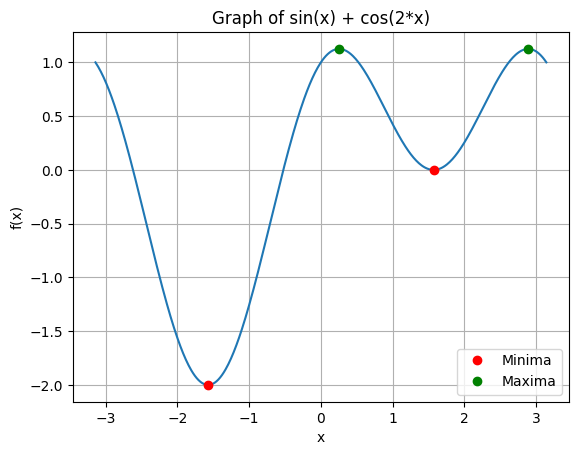

In [9]:
# Create an array of x-values
x_vals = np.linspace(-np.pi, np.pi, 500)

# Evaluate the function for each x-value
"""
This just trying create corresponding y values
for an array of linspace x_vals but we have to
use the subs() method on the zeroth derivative of
the function:

f = sin(x) + cos(2*x)

[derivatives].subs(expr(i.e self keyword), symbol(s) / variable(s) = single or tuple,
A point or list of evaluation points corresponding to those variables.)
"""
y_vals = [f.subs(x, val) for val in x_vals]

# Plot the function
plt.plot(x_vals, y_vals)

"""
We could Mark minima, maxima, and saddle points
for function since we already know them from the
resulting code in the cell above.

Critical Points: [-pi/2, pi/2, 2*atan(4 - sqrt(15)), 2*atan(sqrt(15) + 4)]
Minima critical points : [-pi/2, pi/2]
Maxima critical points: [2*atan(4 - sqrt(15)), 2*atan(sqrt(15) + 4)]
Saddle critical Points: []
"""
minima_x = [-np.pi/2, np.pi/2]
maxima_x = [2*np.arctan(4 - np.sqrt(15)), 2*np.arctan(np.sqrt(15) + 4)]

minima_y = [f.subs(x, val) for val in minima_x]
maxima_y = [f.subs(x, val) for val in maxima_x]

plt.plot(minima_x, minima_y, 'ro', label='Minima')
plt.plot(maxima_x, maxima_y, 'go', label='Maxima')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of sin(x) + cos(2*x)')
plt.legend()
plt.grid(True)
plt.show()
#Create a visualization of the quadratic/algebraic equation

# Task 4: Create separate array of Minimas and maximas

In [10]:
arr_minimas = [(val, f.subs(x, val)) for val in minima_x]
arr_maximas = [(val, f.subs(x, val)) for val in maxima_x]

print(f'The array of minimas is {arr_minimas}, and \nThe array of maximas is {arr_maximas}')




The array of minimas is [(-1.5707963267948966, -2.00000000000000), (1.5707963267948966, 0)], and 
The array of maximas is [(0.25268025514207837, 1.12500000000000), (2.8889123984477147, 1.12500000000000)]


In [11]:
Global_maxima =  max(arr_maximas, key=lambda x: x[1])
Global_minima =  min(arr_minimas, key=lambda x: x[1])

print(f'The global maxima is {Global_maxima}')

print(f'The global minima is {Global_minima}')

The global maxima is (0.25268025514207837, 1.12500000000000)
The global minima is (-1.5707963267948966, -2.00000000000000)


# Task 5: Finding the Area under the curve

In [12]:
#This is where you do integration
"""
we would use numerical integration to find the area under the graph of a function.
SciPy provides the quad function for this purpose.
"""
def integration(x):
  # Define your function here (e.g., f(x) = np.sin(x) + np.cos(2*x))
  return np.sin(x) + np.cos(2*x)

# Define the integration limits
a = -np.pi  # Lower limit
b = np.pi   # Upper limit

# Calculate the area under the curve
area, error = quad(integration, a, b)

print(f"Area under the curve: {area}")

Area under the curve: -1.743934249004316e-16


#Finally, What is the global Minima and the Global maxima _ Plot this so that I can see

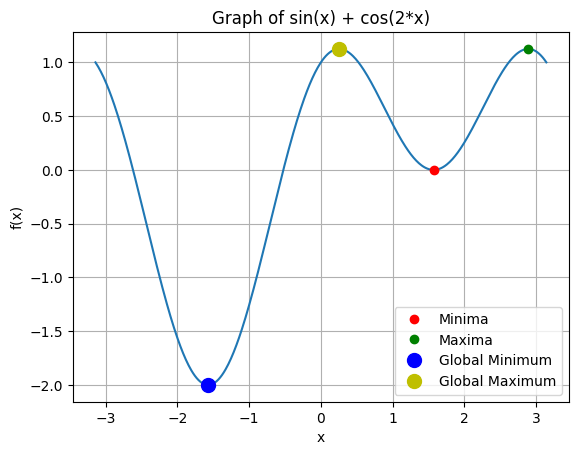

In [14]:
y_vals = [f.subs(x, val) for val in x_vals]

# Plot the function
plt.plot(x_vals, y_vals)

# Mark minima, maxima, and saddle points for function
minima_x = [-np.pi/2, np.pi/2]
maxima_x = [2*np.arctan(4 - np.sqrt(15)), 2*np.arctan(np.sqrt(15) + 4)]

minima_y = [f.subs(x, val) for val in minima_x]
maxima_y = [f.subs(x, val) for val in maxima_x]

plt.plot(minima_x, minima_y, 'ro', label='Minima')
plt.plot(maxima_x, maxima_y, 'go', label='Maxima')

Global_maxima =  max(arr_maximas, key=lambda x: x[1])
Global_minima =  min(arr_minimas, key=lambda x: x[1])

# Plot global minimum and maximum
plt.plot(minima_x[minima_y.index(Global_minima[1])], Global_minima[1], 'bo', markersize=10, label='Global Minimum')
plt.plot(maxima_x[maxima_y.index(Global_maxima[1])], Global_maxima[1], 'yo', markersize=10, label='Global Maximum')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of sin(x) + cos(2*x)')
plt.legend()
plt.grid(True)
plt.show()

# **You can now do the Rest.All the Best ........**